In [1]:
import sys
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from datetime import datetime
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from metpy.units import units  # Use MetPy's unit registry
# Customized functions
sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/transfomer'))
# Import necessary components from the updated NN
from NNstruct_v9 import mask_slices, MultivariableLocalTransformerWithChannelMixer, extract_local_window, restore_output_to_original_shape, train_model_multivariate

sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/functions'))
from data_processing import process_files, load_daily_data
# Define directories and parameters
data_dir = '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/data/2016/'
start_UT = 0
end_UT = 8
dt = 0.1
nepoch = int((end_UT - start_UT) / dt)

# Create output directory
base_dir = '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/Results/newrun/'
current_date = datetime.now().strftime('%m_%d_%y')
output_dir = os.path.join(base_dir, current_date)
os.makedirs(output_dir, exist_ok=True)
print(f"Results will be saved in: {output_dir}")

# Load data files
all_files = [f for f in os.listdir(data_dir) if f.endswith('.dat') and '15min_1.0km_60s' in f]
random.shuffle(all_files)

# Split into train and test sets
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Process training and test data
train_data = process_files(train_files, start_UT, end_UT, data_dir)
test_data = process_files(test_files, start_UT, end_UT, data_dir)

# Print data shapes for verification
print("Training Data Shapes:")
for key in train_data.keys():
    print(f"Shape of {key}: {train_data[key].shape}")

print("Test Data Shapes:")
for key in test_data.keys():
    print(f"Shape of {key}: {test_data[key].shape}")

# Define the multivariable transformer model
# Set device
device = torch.device("mps" if torch.has_mps else "cpu")
# Model hyperparameters
batch_size = 16
time_steps = 80
altitude_levels = 71
input_dim = 3   # Sodium density, wind, and temperature are 3-dimensional inputs
d_model = 64    # Reduced embedding dimension
nhead = 8       # Attention heads
num_layers = 4  # Transformer layers
dim_feedforward = 256  # Feedforward layer size
num_epochs = 300  # Number of epochs
window_size = 3
mask_ratio = 0.8
step_size = 1
base_weight = 1
lambda_smooth = 1

# Initialize the multivariable transformer model
model = MultivariableLocalTransformerWithChannelMixer(
    input_dim=input_dim,    # Multivariable inputs
    d_model=d_model,
    nhead=nhead,
    num_layers=num_layers,
    dim_feedforward=dim_feedforward,
    window_size=window_size  # Assuming a 3x3 window size
).to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# Variables to load (e.g., Sodium density, Wind, Temperature)
variables = ["Na Density (cm^(-3))", "Vertical Wind (m/s)", "Temperature (K)"]
# Train the multivariable model using the local windows approach
train_model_multivariate(
    model, 
    train_files, 
    test_files, 
    data_dir, 
    variables,        # Variables to process
    optimizer, 
    num_epochs, 
    device, 
    batch_size, 
    start_UT, 
    end_UT, 
    output_dir,
    window_size,
    mask_ratio,
    time_steps, 
    altitude_levels,
    step_size, 
    base_weight, 
    lambda_smooth
)

Results will be saved in: /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/Results/newrun/11_05_24
Training Data Shapes:
Shape of Na Density (cm^(-3)): (71, 1840)
Shape of Na Density Error (cm^(-3)): (71, 1840)
Shape of Temperature (K): (71, 1840)
Shape of Temperature Error (K): (71, 1840)
Shape of Vertical Wind (m/s): (71, 1840)
Shape of Vertical Wind Error (m/s): (71, 1840)
Shape of Zonal Wind (m/s): (71, 1840)
Shape of Zonal Wind Error (m/s): (71, 1840)
Shape of Meridional Wind (m/s): (71, 1840)
Shape of Meridional Wind Error (m/s): (71, 1840)
Shape of YYYYMMDD_hhmm: (1840,)
Shape of Altitudes [km]: (71,)
Test Data Shapes:
Shape of Na Density (cm^(-3)): (71, 480)
Shape of Na Density Error (cm^(-3)): (71, 480)
Shape of Temperature (K): (71, 480)
Shape of Temperature Error (K): (71, 480)
Shape of Vertical Wind (m/s): (71, 480)
Shape of Vertical Wind Error (m/s): (71, 480)
Shape of Zonal Wind (m/s): (71, 480)
Shape of Zonal Wind Error (m/s): (71, 480)
Shape of Meridional Wind (m/s): (71, 

/var/folders/2c/2k10l7w17539zwm_06lqntvh0000gq/T/ipykernel_31328/1084421187.py:55: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = torch.device("mps" if torch.has_mps else "cpu")



Starting epoch 1/300
File /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160309_0000_msise00_atmospheric_data.csv does not exist. Retrieving and saving atmospheric data.
MSISE00 atmospheric data saved as /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160309_0000_msise00_atmospheric_data.csv
File /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160309_0000_msise00_atmospheric_data.csv exists. Loading atmospheric data.
Atmospheric and potential temperature data saved as /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160309_0000_msise00_atmospheric_data.csv
File /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160312_0000_msise00_atmospheric_data.csv does not exist. Retrieving and saving atmospheric data.
MSISE00 atmospheric data saved as /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160312_0000_msise00_atmospheric_data.csv
File /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/model/msise/20160312_0000_msise00_atmosp

FileNotFoundError: [Errno 2] No such file or directory: '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/data/2016/20160310_15min_1.0km_60s_20_DTWUV.dat'

In [ ]:
import sys
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from datetime import datetime
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from metpy.units import units  # Use MetPy's unit registry
# Customized functions
sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/transfomer'))
# Import necessary components from the updated NN
from NNstruct_v9 import mask_slices, MultivariableLocalTransformerWithChannelMixer, extract_local_window, restore_output_to_original_shape, train_model_multivariate

sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/functions'))
from data_processing import process_files, load_daily_data
# Define directories and parameters
data_dir = '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/data/2016/'
start_UT = 0
end_UT = 8
dt = 0.1
nepoch = int((end_UT - start_UT) / dt)

# Create output directory
base_dir = '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/Results/newrun/'
current_date = datetime.now().strftime('%m_%d_%y')
output_dir = os.path.join(base_dir, current_date)
os.makedirs(output_dir, exist_ok=True)
print(f"Results will be saved in: {output_dir}")

# Load data files
all_files = [f for f in os.listdir(data_dir) if f.endswith('.dat') and '15min_1.0km_60s' in f]
random.shuffle(all_files)

# Split into train and test sets
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Process training and test data
train_data = process_files(train_files, start_UT, end_UT, data_dir)
test_data = process_files(test_files, start_UT, end_UT, data_dir)

# Print data shapes for verification
print("Training Data Shapes:")
for key in train_data.keys():
    print(f"Shape of {key}: {train_data[key].shape}")

print("Test Data Shapes:")
for key in test_data.keys():
    print(f"Shape of {key}: {test_data[key].shape}")

# Define the multivariable transformer model
# Set device
device = torch.device("mps" if torch.has_mps else "cpu")
# Model hyperparameters
batch_size = 16
time_steps = 80
altitude_levels = 71
input_dim = 3   # Sodium density, wind, and temperature are 3-dimensional inputs
d_model = 64    # Reduced embedding dimension
nhead = 8       # Attention heads
num_layers = 4  # Transformer layers
dim_feedforward = 256  # Feedforward layer size
num_epochs = 300  # Number of epochs
window_size = 3
mask_ratio = 0.8
step_size = 1
base_weight = 1
lambda_smooth = 1

# Initialize the multivariable transformer model
model = MultivariableLocalTransformerWithChannelMixer(
    input_dim=input_dim,    # Multivariable inputs
    d_model=d_model,
    nhead=nhead,
    num_layers=num_layers,
    dim_feedforward=dim_feedforward,
    window_size=window_size  # Assuming a 3x3 window size
).to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# Variables to load (e.g., Sodium density, Wind, Temperature)
variables = ["Na Density (cm^(-3))", "Vertical Wind (m/s)", "Temperature (K)"]
# Train the multivariable model using the local windows approach
train_model_multivariate(
    model, 
    train_files, 
    test_files, 
    data_dir, 
    variables,        # Variables to process
    optimizer, 
    num_epochs, 
    device, 
    batch_size, 
    start_UT, 
    end_UT, 
    output_dir,
    window_size,
    mask_ratio,
    time_steps, 
    altitude_levels,
    step_size, 
    base_weight, 
    lambda_smooth
)

Results will be saved in: /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/Results/newrun/11_04_24
Training Data Shapes:
Shape of Na Density (cm^(-3)): (71, 1840)
Shape of Na Density Error (cm^(-3)): (71, 1840)
Shape of Temperature (K): (71, 1840)
Shape of Temperature Error (K): (71, 1840)
Shape of Vertical Wind (m/s): (71, 1840)
Shape of Vertical Wind Error (m/s): (71, 1840)
Shape of Zonal Wind (m/s): (71, 1840)
Shape of Zonal Wind Error (m/s): (71, 1840)
Shape of Meridional Wind (m/s): (71, 1840)
Shape of Meridional Wind Error (m/s): (71, 1840)
Shape of YYYYMMDD_hhmm: (1840,)
Shape of Altitudes [km]: (71,)
Test Data Shapes:
Shape of Na Density (cm^(-3)): (71, 480)
Shape of Na Density Error (cm^(-3)): (71, 480)
Shape of Temperature (K): (71, 480)
Shape of Temperature Error (K): (71, 480)
Shape of Vertical Wind (m/s): (71, 480)
Shape of Vertical Wind Error (m/s): (71, 480)
Shape of Zonal Wind (m/s): (71, 480)
Shape of Zonal Wind Error (m/s): (71, 480)
Shape of Meridional Wind (m/s): (71, 

/var/folders/2c/2k10l7w17539zwm_06lqntvh0000gq/T/ipykernel_77908/1084421187.py:55: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = torch.device("mps" if torch.has_mps else "cpu")



Starting epoch 1/300
File 20160225_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.
File 20160314_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.
File 20161108_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.
File 20161023_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.
File 20161106_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.
File 20161028_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.
File 20161109_0000_msise00_atmospheric_data_with_potential_temp.csv exists. Loading potential temperature data.


In [1]:
import sys
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from datetime import datetime
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Customized functions
sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/transfomer'))
# Import necessary components from the updated NN
from NNstruct_v9 import mask_slices, MultivariableLocalTransformerWithChannelMixer, extract_local_window, restore_output_to_original_shape, train_model_multivariate

sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/functions'))
from data_processing import process_files, load_daily_data
# Define directories and parameters
data_dir = '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/data/2016/'
start_UT = 0
end_UT = 8
dt = 0.1
nepoch = int((end_UT - start_UT) / dt)

# Create output directory
base_dir = '/Users/huj7/Desktop/ERAU/MVI-2D-multivariable/Results/newrun/'
current_date = datetime.now().strftime('%m_%d_%y')
output_dir = os.path.join(base_dir, current_date)
os.makedirs(output_dir, exist_ok=True)
print(f"Results will be saved in: {output_dir}")

# Load data files
all_files = [f for f in os.listdir(data_dir) if f.endswith('.dat') and '15min_1.0km_60s' in f]
random.shuffle(all_files)

# Split into train and test sets
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Process training and test data
train_data = process_files(train_files, start_UT, end_UT, data_dir)
test_data = process_files(test_files, start_UT, end_UT, data_dir)

# Print data shapes for verification
print("Training Data Shapes:")
for key in train_data.keys():
    print(f"Shape of {key}: {train_data[key].shape}")

print("Test Data Shapes:")
for key in test_data.keys():
    print(f"Shape of {key}: {test_data[key].shape}")

# Define the multivariable transformer model

# Set device
device = torch.device("mps" if torch.has_mps else "cpu")

# Model hyperparameters
batch_size = 16
time_steps = 80
altitude_levels = 71
input_dim = 3   # Sodium density, wind, and temperature are 3-dimensional inputs
d_model = 64    # Reduced embedding dimension
nhead = 8       # Attention heads
num_layers = 4  # Transformer layers
dim_feedforward = 256  # Feedforward layer size
num_epochs = 300  # Number of epochs
window_size = 3
mask_ratio = 0.8
step_size = 1
base_weight = 1
lambda_smooth = 1

# Initialize the multivariable transformer model
model = MultivariableLocalTransformerWithChannelMixer(
    input_dim=input_dim,    # Multivariable inputs
    d_model=d_model,
    nhead=nhead,
    num_layers=num_layers,
    dim_feedforward=dim_feedforward,
    window_size=window_size  # Assuming a 3x3 window size
).to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Variables to load (e.g., Sodium density, Wind, Temperature)
variables = ["Na Density (cm^(-3))", "Vertical Wind (m/s)", "Temperature (K)"]

# Train the multivariable model using the local windows approach
train_model_multivariate(
    model, 
    train_files, 
    test_files, 
    data_dir, 
    variables,        # Variables to process
    optimizer, 
    num_epochs, 
    device, 
    batch_size, 
    start_UT, 
    end_UT, 
    output_dir,
    window_size,
    mask_ratio,
    time_steps, 
    altitude_levels,
    step_size, 
    base_weight, 
    lambda_smooth
)

Results will be saved in: /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/Results/newrun/10_30_24
Training Data Shapes:
Shape of Na Density (cm^(-3)): (71, 1840)
Shape of Na Density Error (cm^(-3)): (71, 1840)
Shape of Temperature (K): (71, 1840)
Shape of Temperature Error (K): (71, 1840)
Shape of Vertical Wind (m/s): (71, 1840)
Shape of Vertical Wind Error (m/s): (71, 1840)
Shape of Zonal Wind (m/s): (71, 1840)
Shape of Zonal Wind Error (m/s): (71, 1840)
Shape of Meridional Wind (m/s): (71, 1840)
Shape of Meridional Wind Error (m/s): (71, 1840)
Shape of YYYYMMDD_hhmm: (1840,)
Shape of Altitudes [km]: (71,)
Test Data Shapes:
Shape of Na Density (cm^(-3)): (71, 480)
Shape of Na Density Error (cm^(-3)): (71, 480)
Shape of Temperature (K): (71, 480)
Shape of Temperature Error (K): (71, 480)
Shape of Vertical Wind (m/s): (71, 480)
Shape of Vertical Wind Error (m/s): (71, 480)
Shape of Zonal Wind (m/s): (71, 480)
Shape of Zonal Wind Error (m/s): (71, 480)
Shape of Meridional Wind (m/s): (71, 

/var/folders/2c/2k10l7w17539zwm_06lqntvh0000gq/T/ipykernel_6898/3462100529.py:56: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = torch.device("mps" if torch.has_mps else "cpu")



Starting epoch 1/300
> /Users/huj7/Desktop/ERAU/MVI-2D-multivariable/functions/P_var.py(89)calculate_potential_temperature()
     87         pdb.set_trace()
     88         # Calculate pressure in Pascals using the ideal gas law
---> 89         pressure = calculate_pressure(total_density_with_units, temperature)
     90 
     91         # Convert pressure from Pascals to hPa for use in MetPy



In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from NNstruct_v9 import load_multivariate_data, plot_and_save_2d_comparison, mask_slices, MultivariableLocalTransformerWithChannelMixer, extract_local_window, restore_output_to_original_shape

def impute_missing_data(
    model, 
    data_dir, 
    imputation_files, 
    variables, 
    device, 
    batch_size, 
    start_UT, 
    end_UT, 
    output_dir, 
    window_size, 
    time_steps, 
    altitude_levels, 
    step_size
):
    """
    Function to impute missing data using a pre-trained model.

    Arguments:
    - model: The pre-trained model for imputation.
    - data_dir: Directory containing the data.
    - imputation_files: List of files to impute.
    - variables: List of variables (e.g., sodium density, wind, temperature).
    - device: Device (e.g., 'cuda' or 'cpu').
    - batch_size: Batch size for the DataLoader.
    - start_UT, end_UT: Start and end times for extracting the data.
    - output_dir: Directory to save imputed results.
    - window_size: The size of the window for local extraction.
    - time_steps, altitude_levels: Time and altitude dimensions of the data.
    - step_size: Step size for the sliding window.

    Returns:
    - imputed_data: The data with imputed values filled in.
    """
    model.eval()
    imputed_results = []

    with torch.no_grad():
        for index, filename in enumerate(imputation_files):
            # Load the data from the file
            val_data, scalers = load_multivariate_data(data_dir, [filename], start_UT, end_UT, variables)
            
            # Mask NaN values in the validation data
            mask_val = torch.isnan(val_data).float().to(device)
            mask_val = 1.0 - mask_val
            val_data = torch.nan_to_num(val_data, nan=0.0).to(device)
            target_val_data = val_data.clone()

            # Create the DataLoader for batch processing
            val_dataset = TensorDataset(val_data, target_val_data, mask_val)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            for batch_idx, (batch_data, batch_target, batch_mask) in enumerate(val_loader):
                batch_data, batch_target, batch_mask = batch_data.to(device), batch_target.to(device), batch_mask.to(device)

                # Apply the mask to get the masked data
                masked_data = batch_data * batch_mask
                
                # Extract local windows and their masks
                local_windows, local_masks = extract_local_window(masked_data, batch_mask, window_size, step_size)
                local_windows_orig, local_masks_orig = extract_local_window(batch_data, batch_mask, window_size, step_size)
                
                # Perform the imputation by passing through the model
                output = model(local_windows)
                
                # Restore the output to its original shape
                restored_output = restore_output_to_original_shape(output, batch_data.shape[0], time_steps, altitude_levels, window_size, step_size)

                # Optionally plot and save comparison images for visualization
                plot_and_save_2d_comparison(restored_output, masked_data, batch_data, index, output_dir, time_steps, altitude_levels, batch_idx, variables, 'imputation')

                # Collect the restored output for further processing
                imputed_results.append(restored_output.cpu())

    # Combine all the imputed results into a single tensor
    imputed_data = torch.cat(imputed_results, dim=0)

    return imputed_data


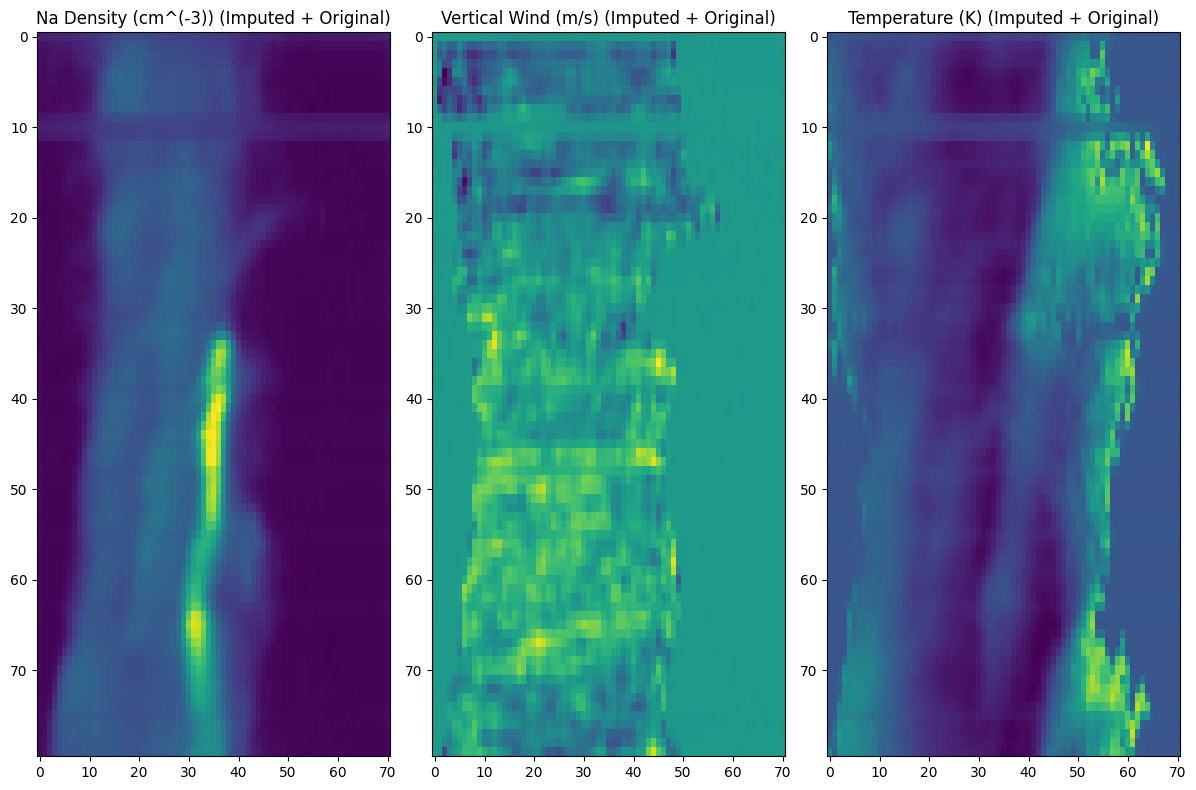

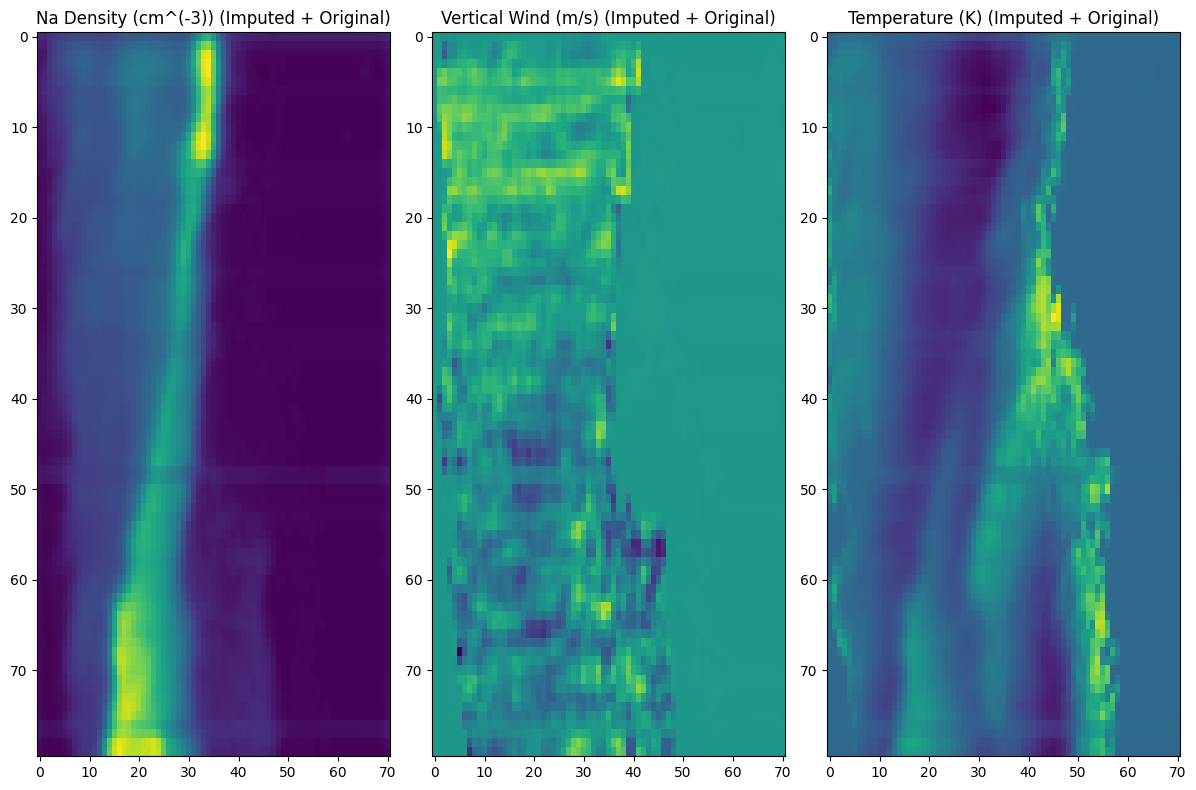

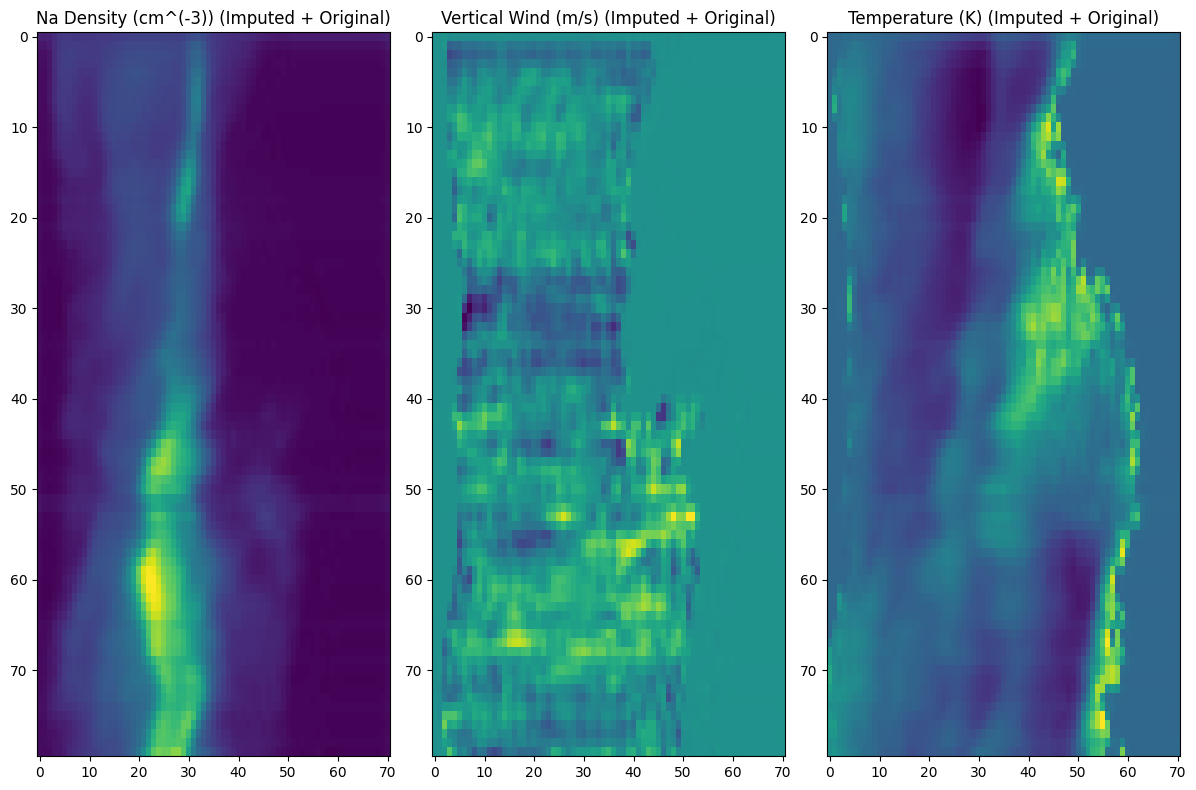

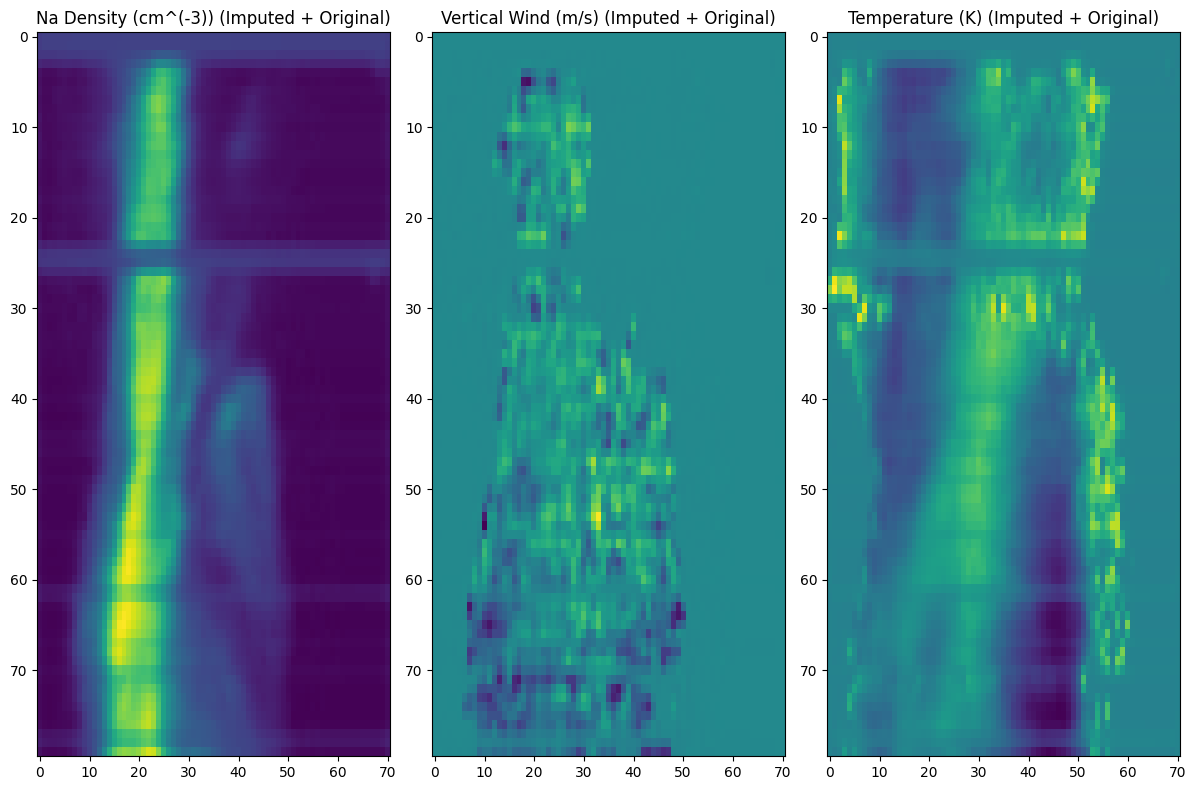

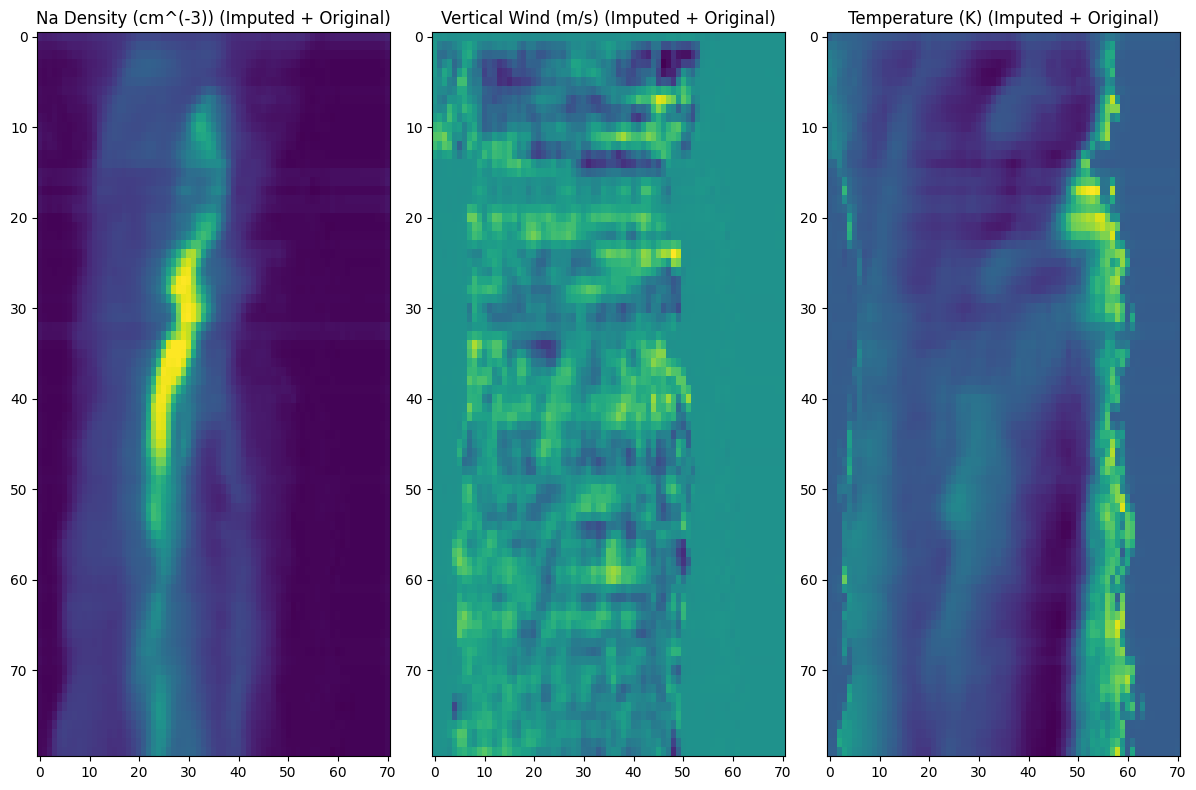

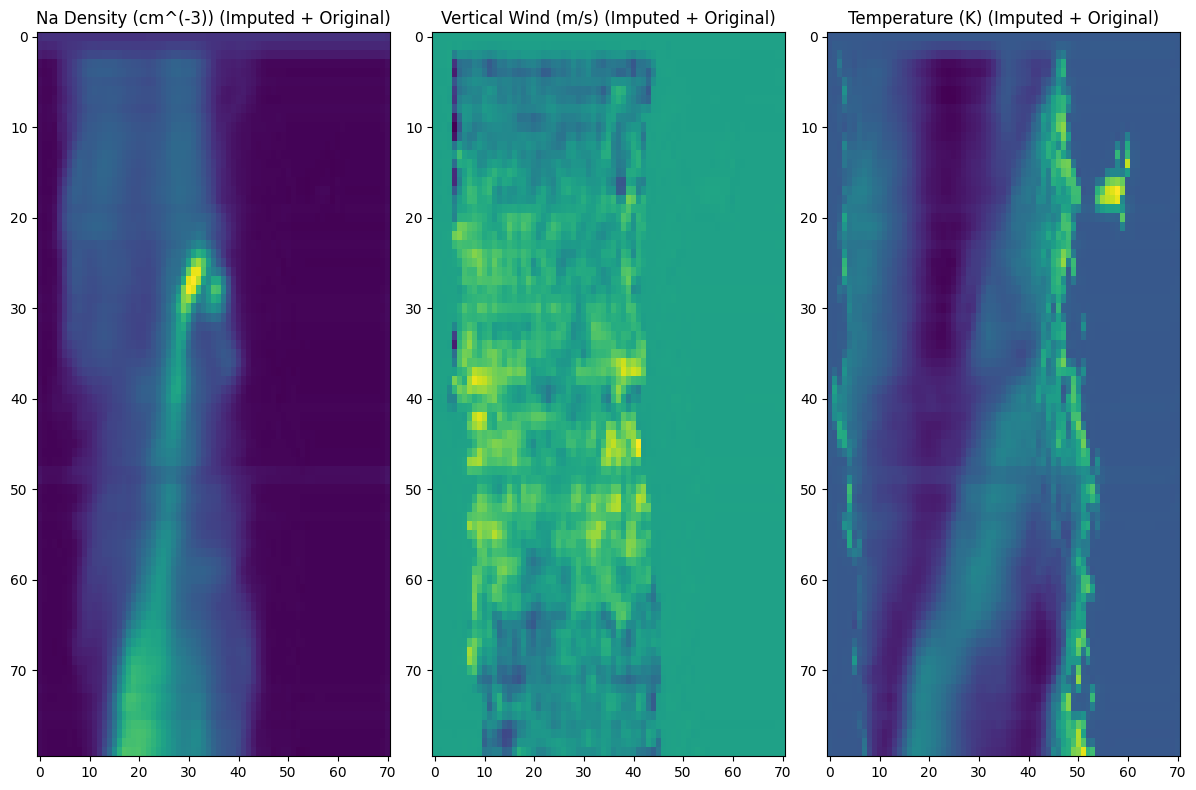

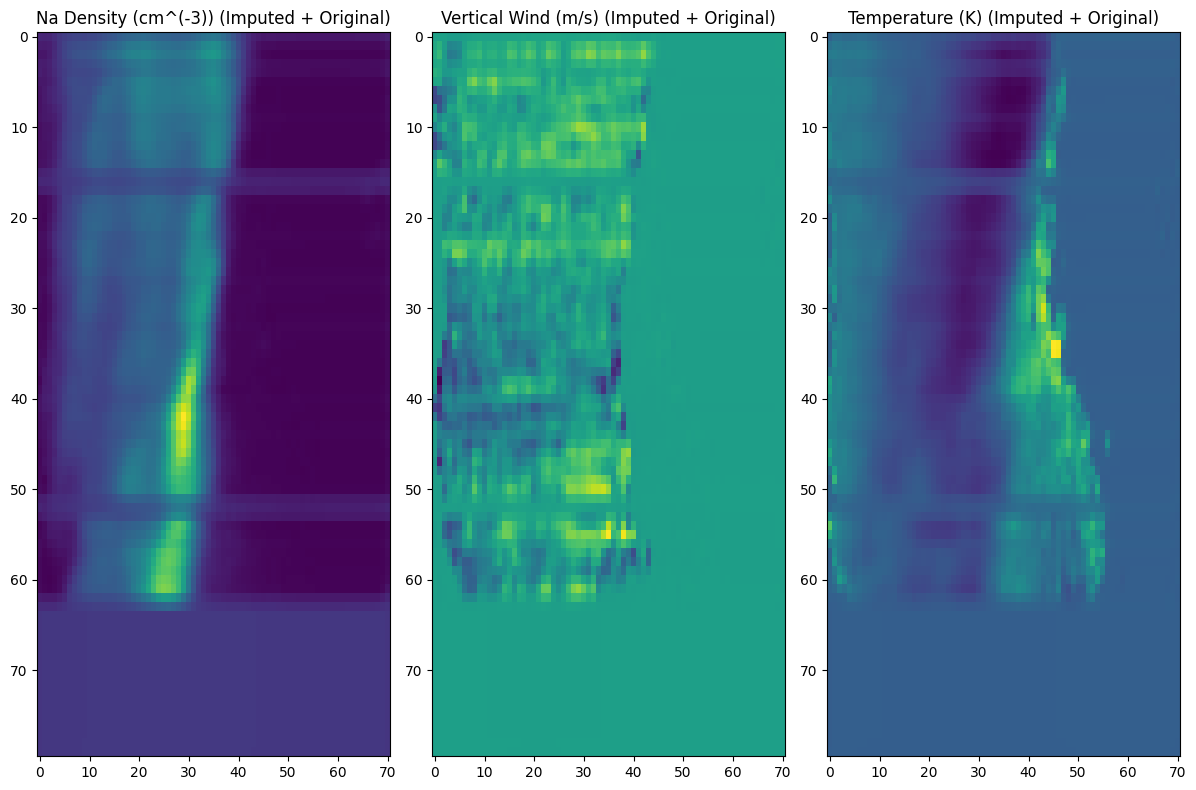

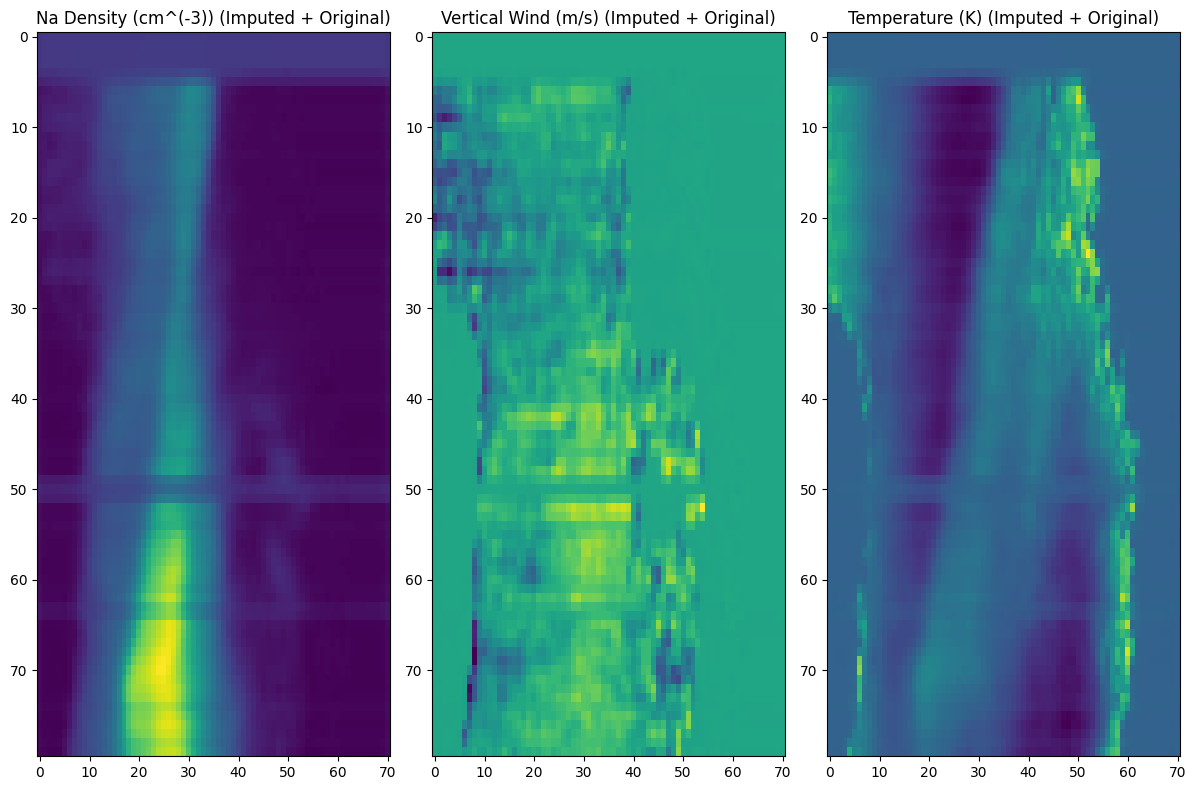

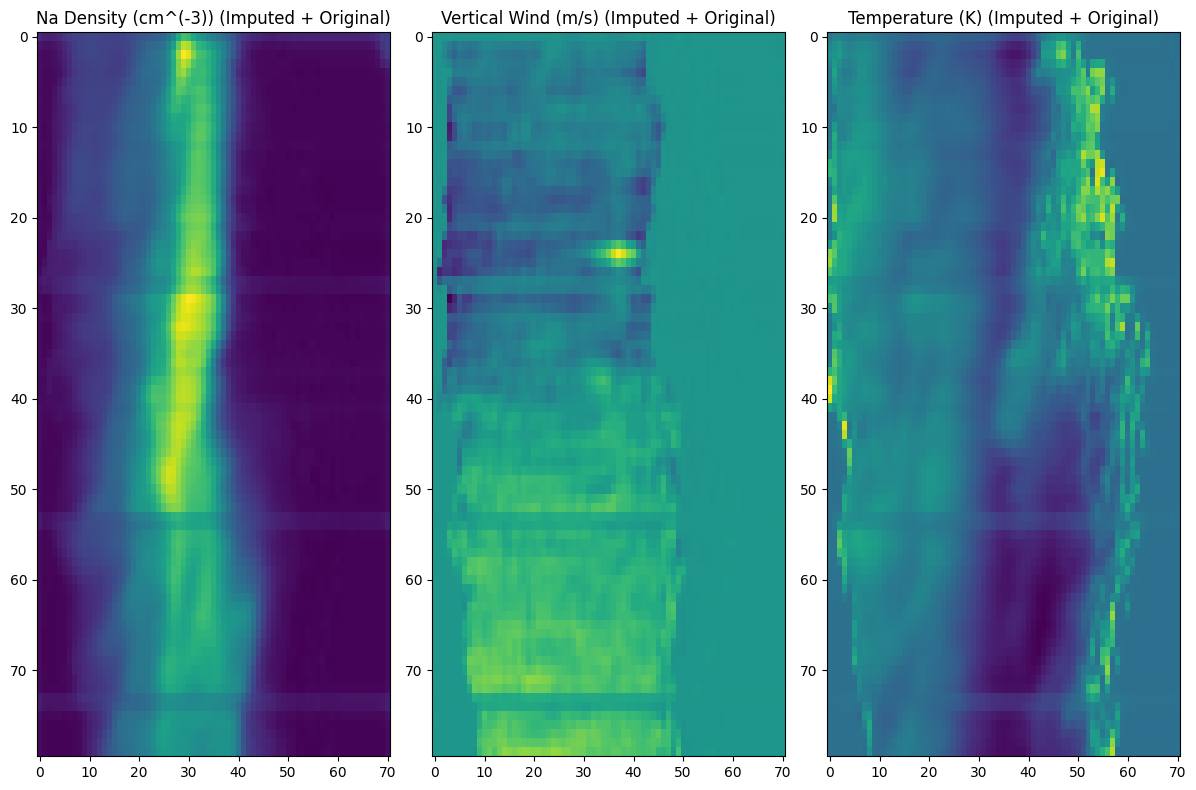

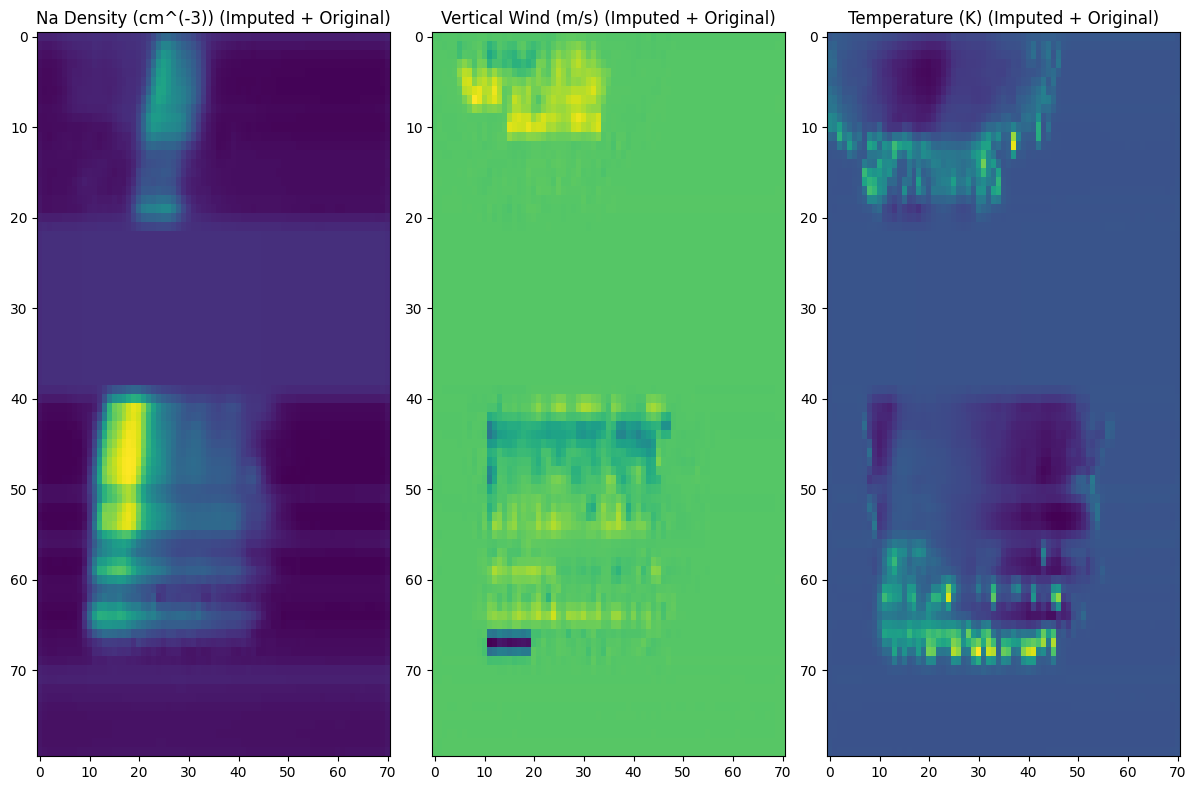

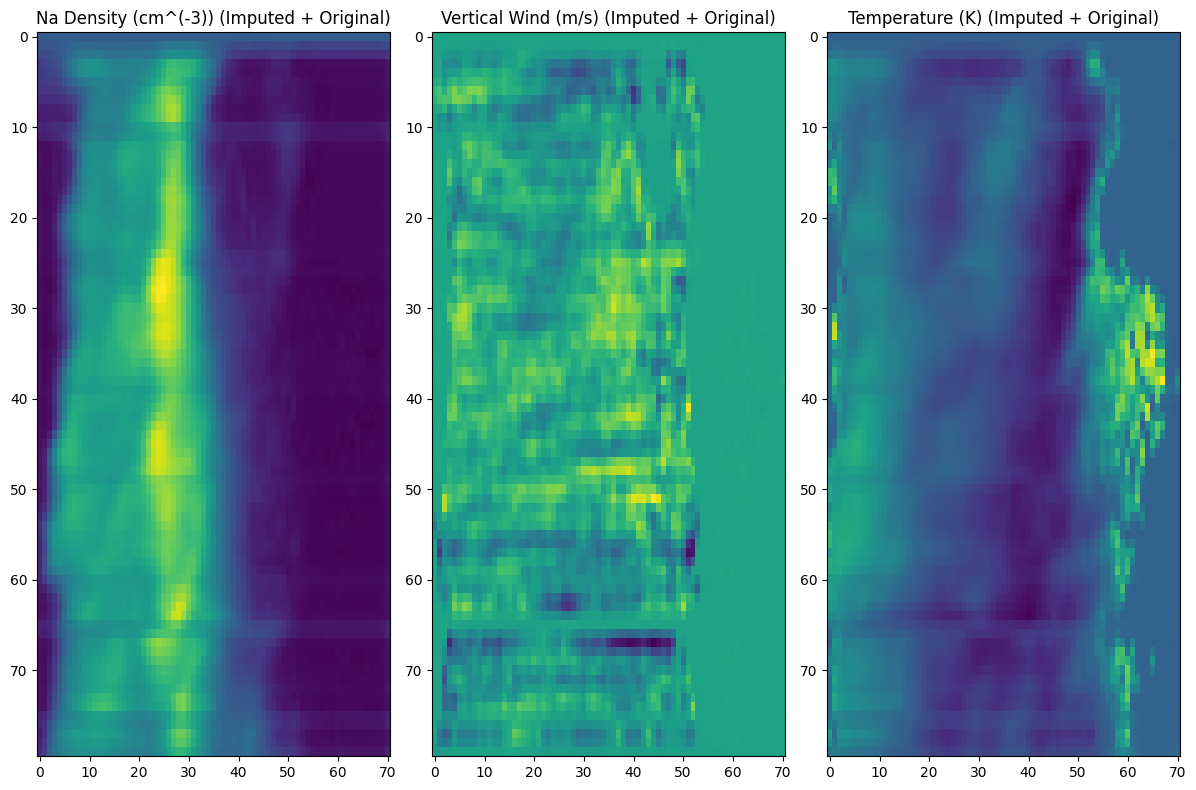

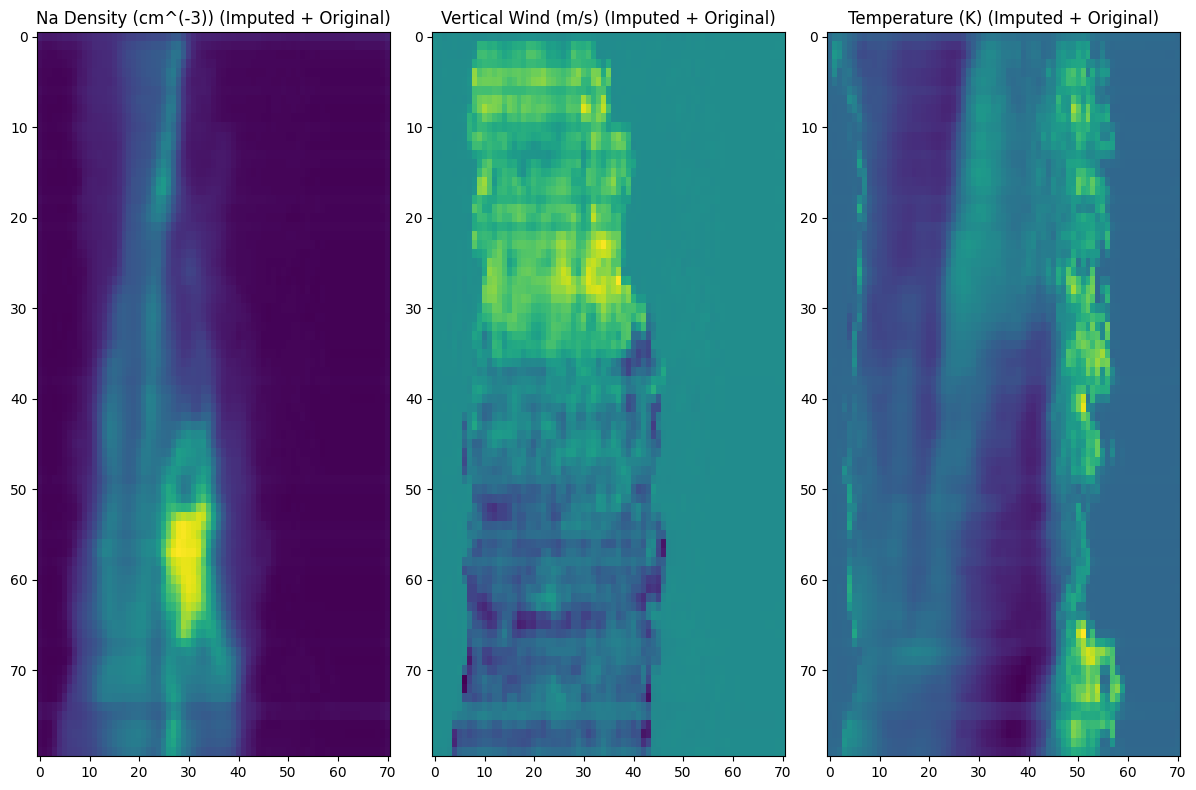

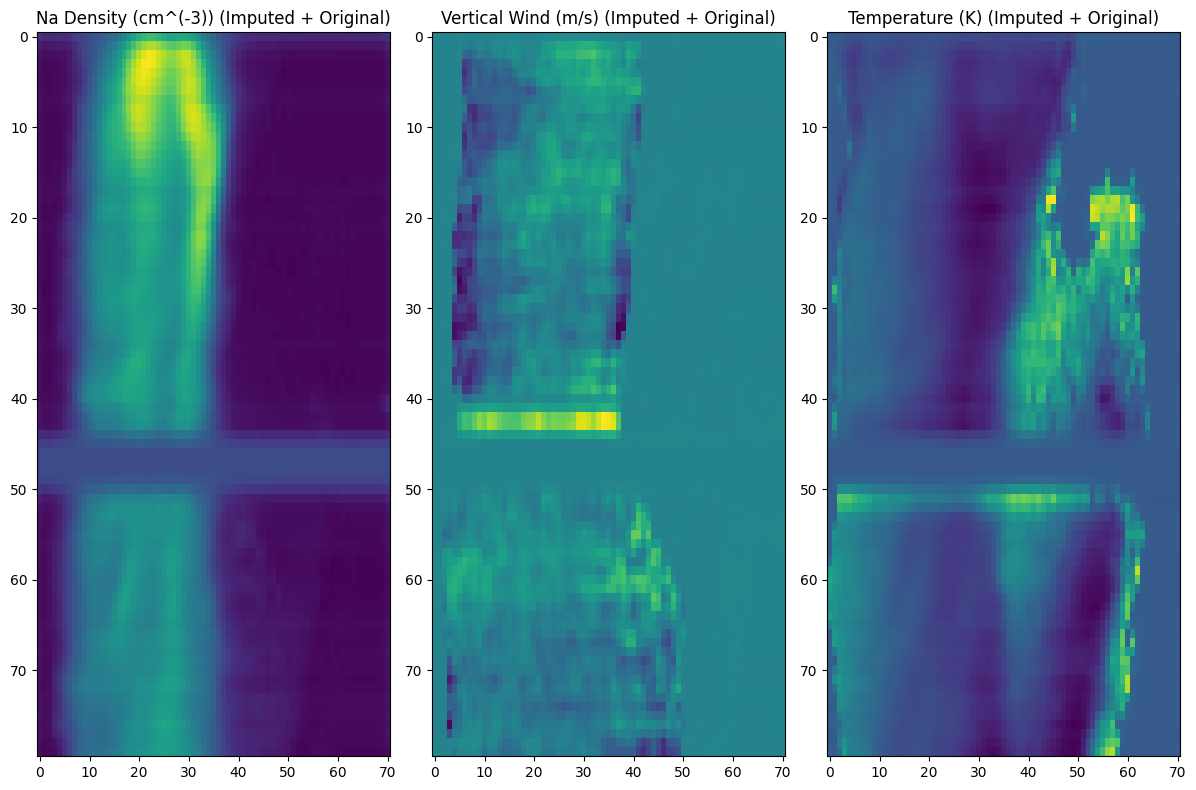

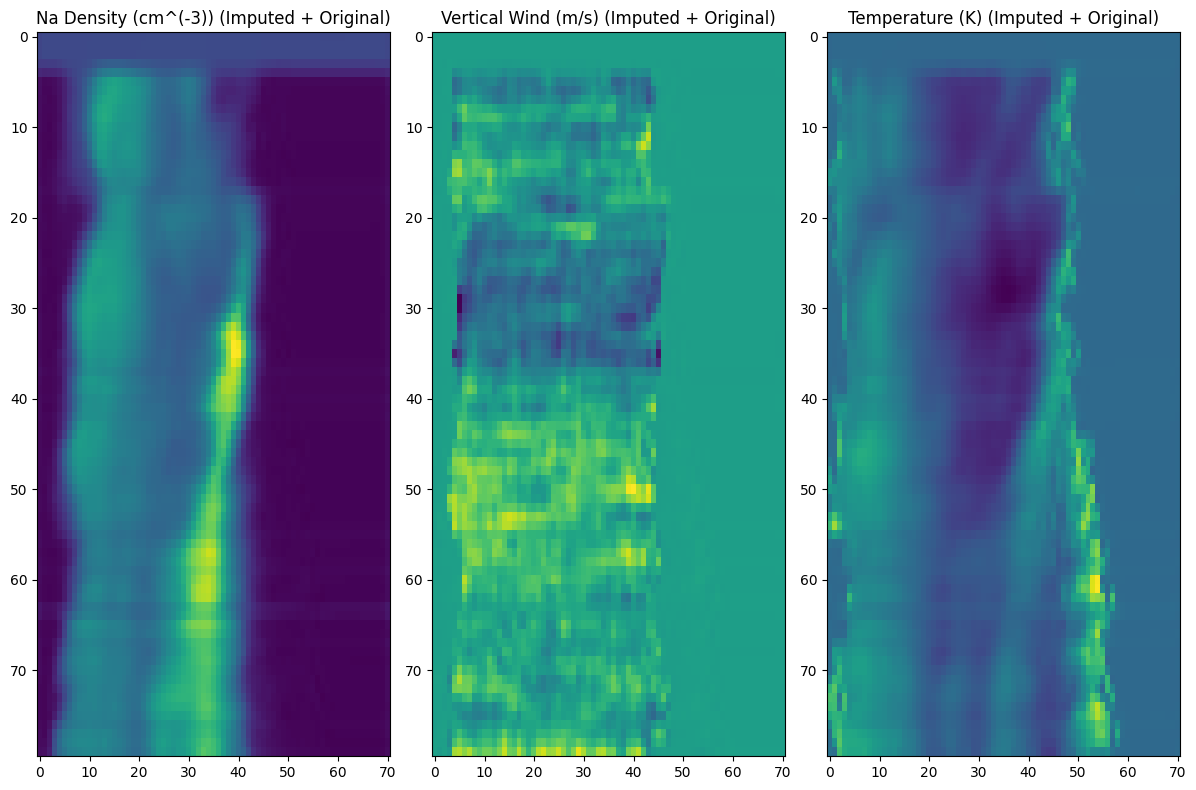

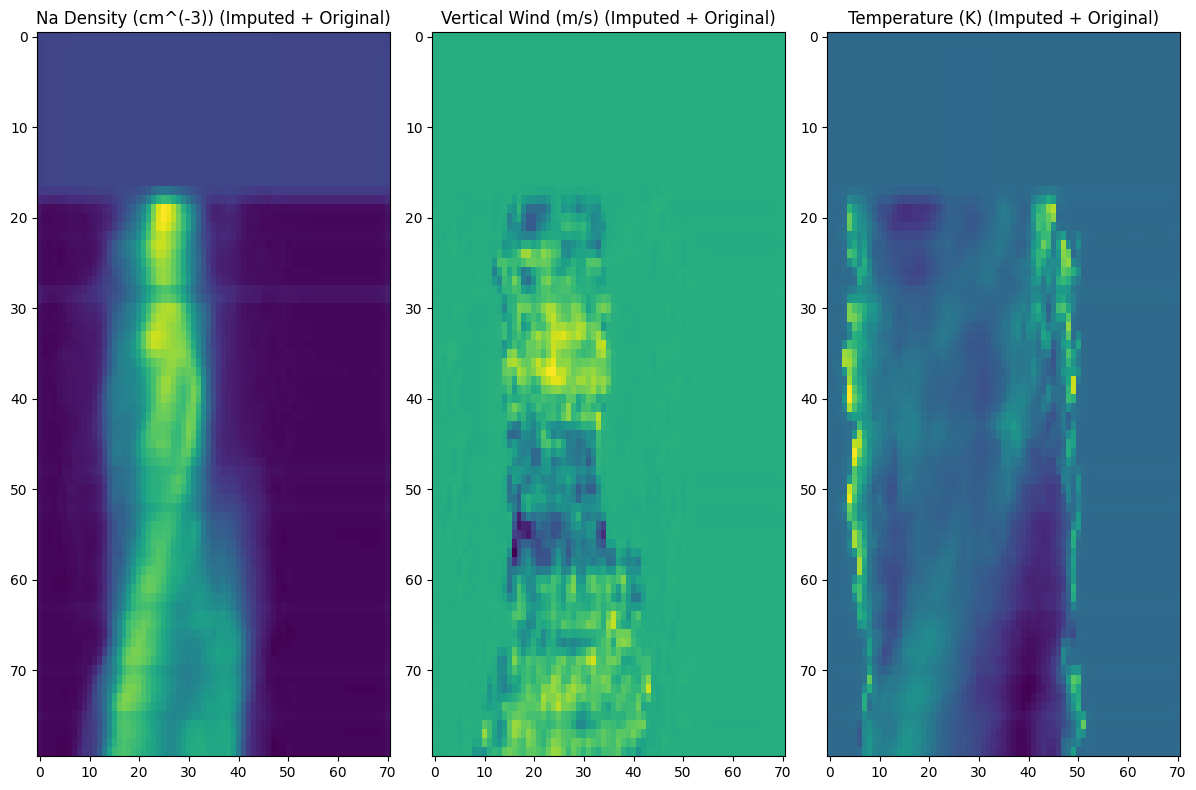

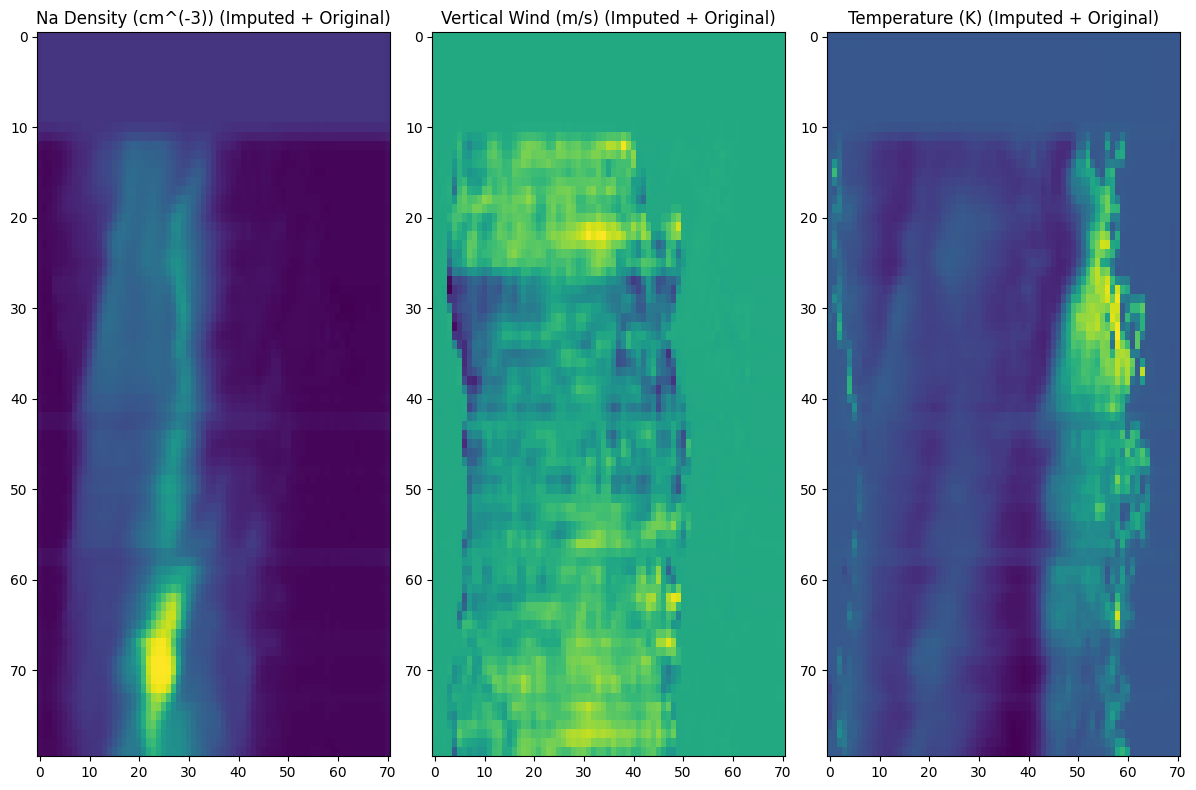

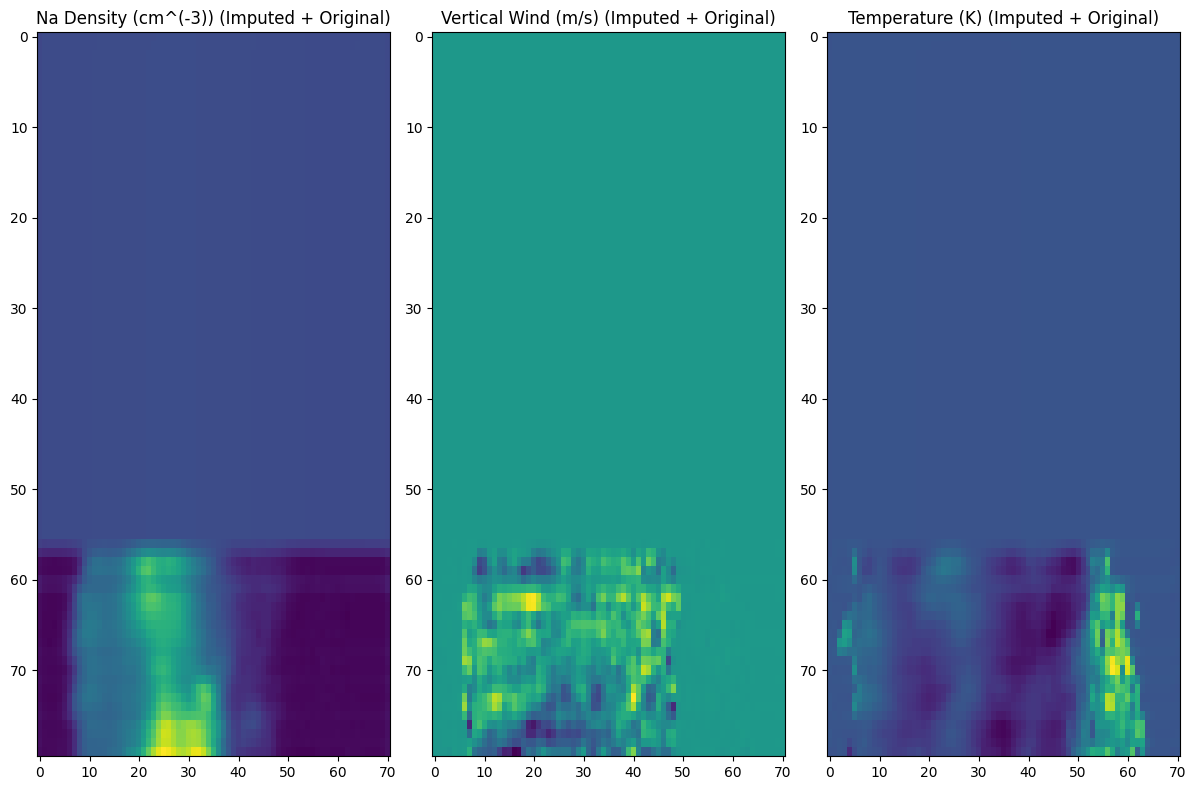

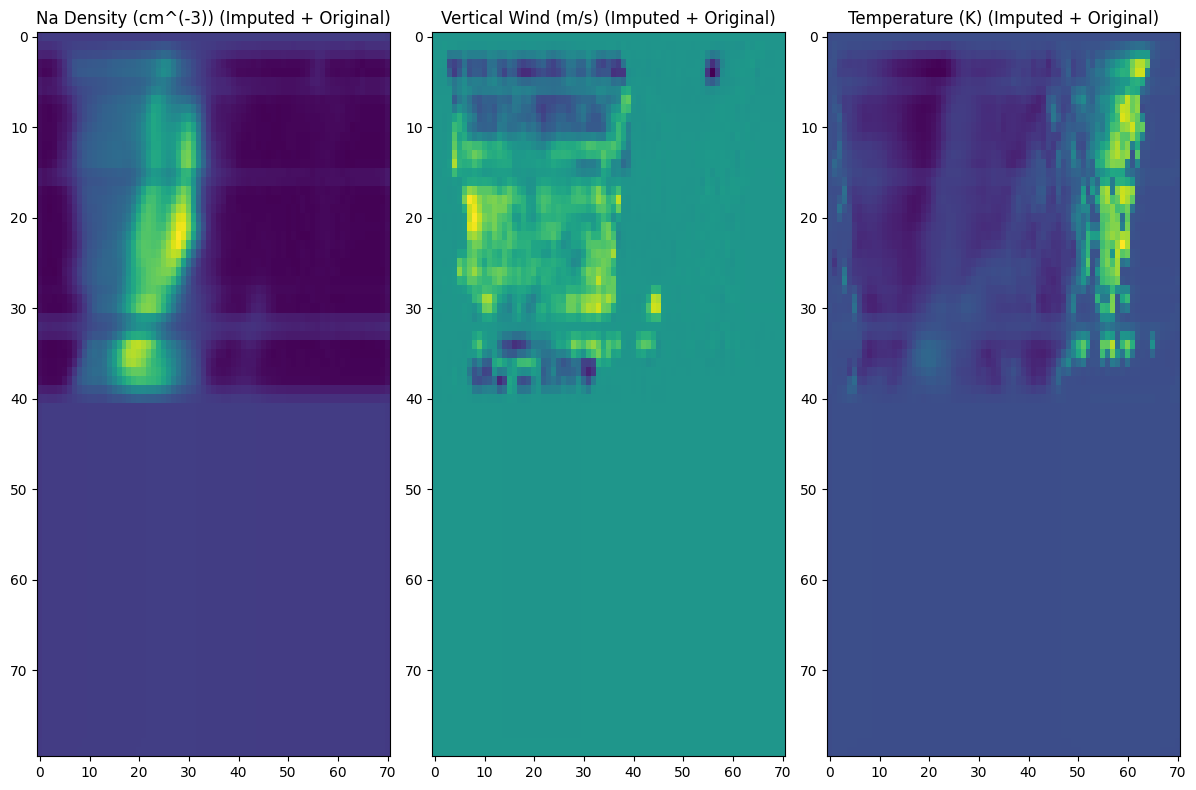

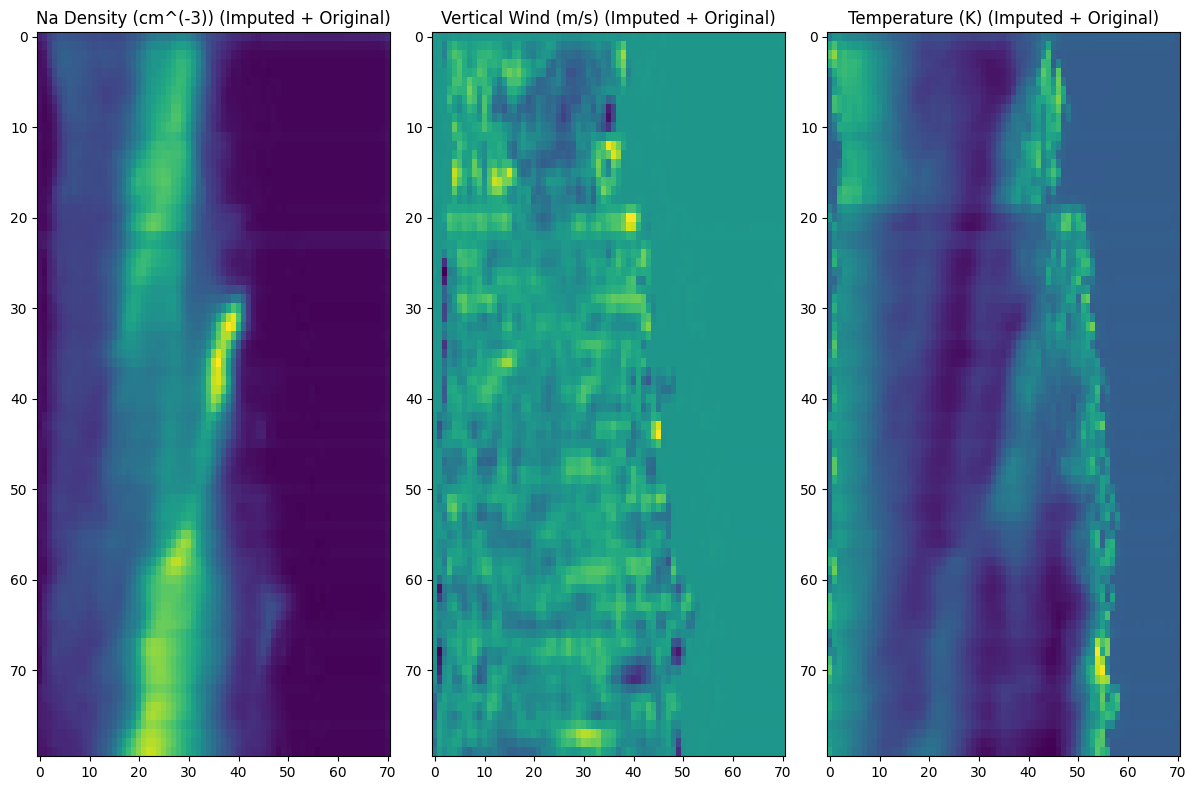

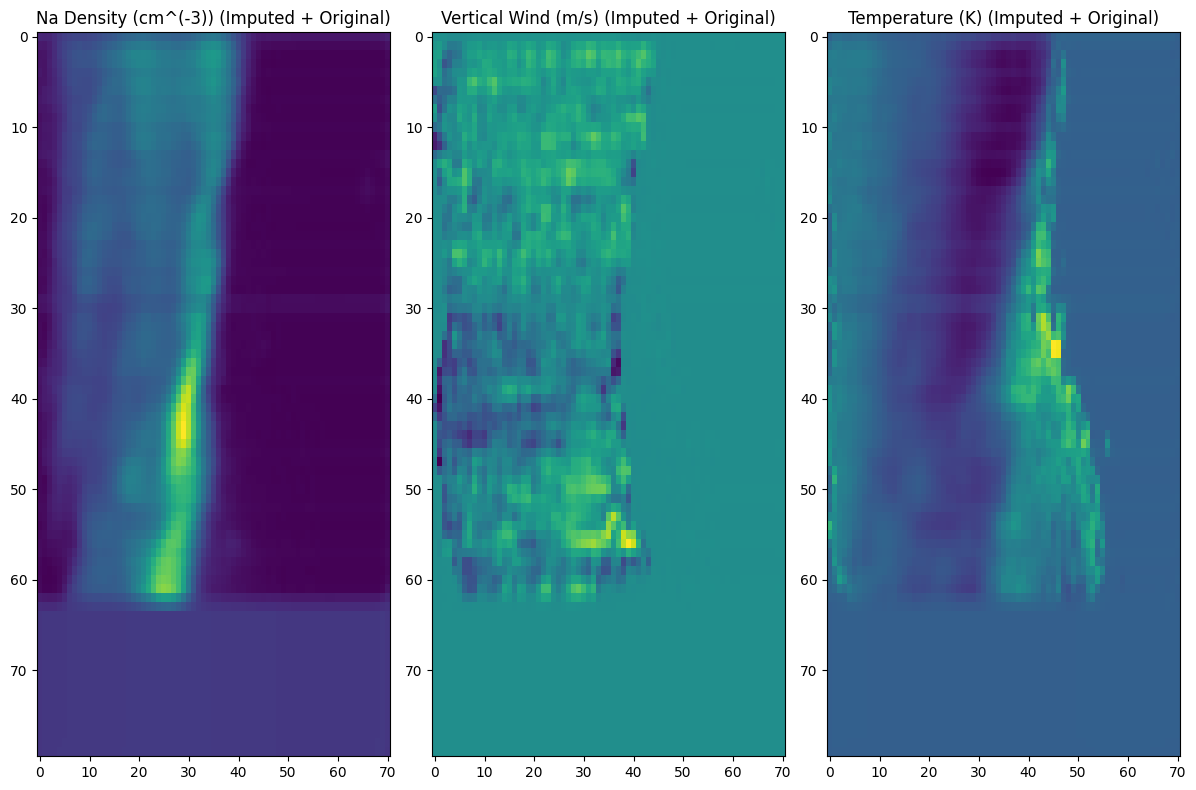

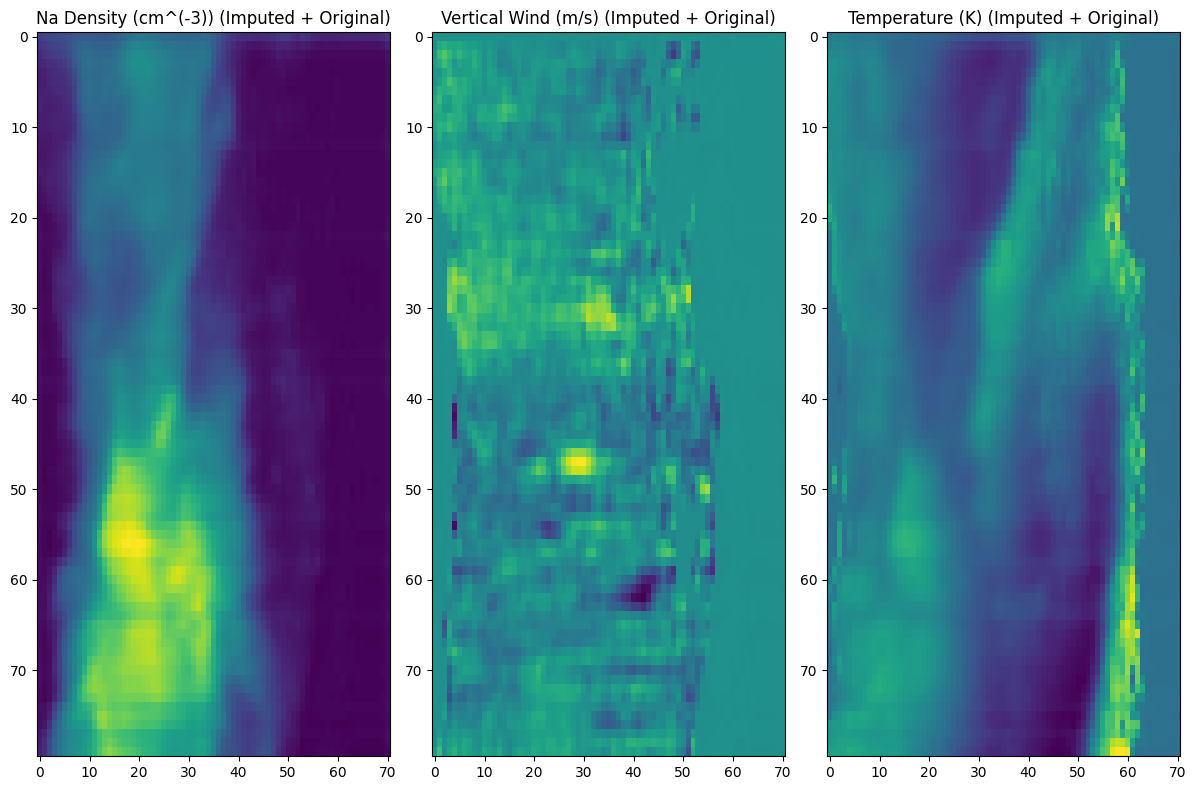

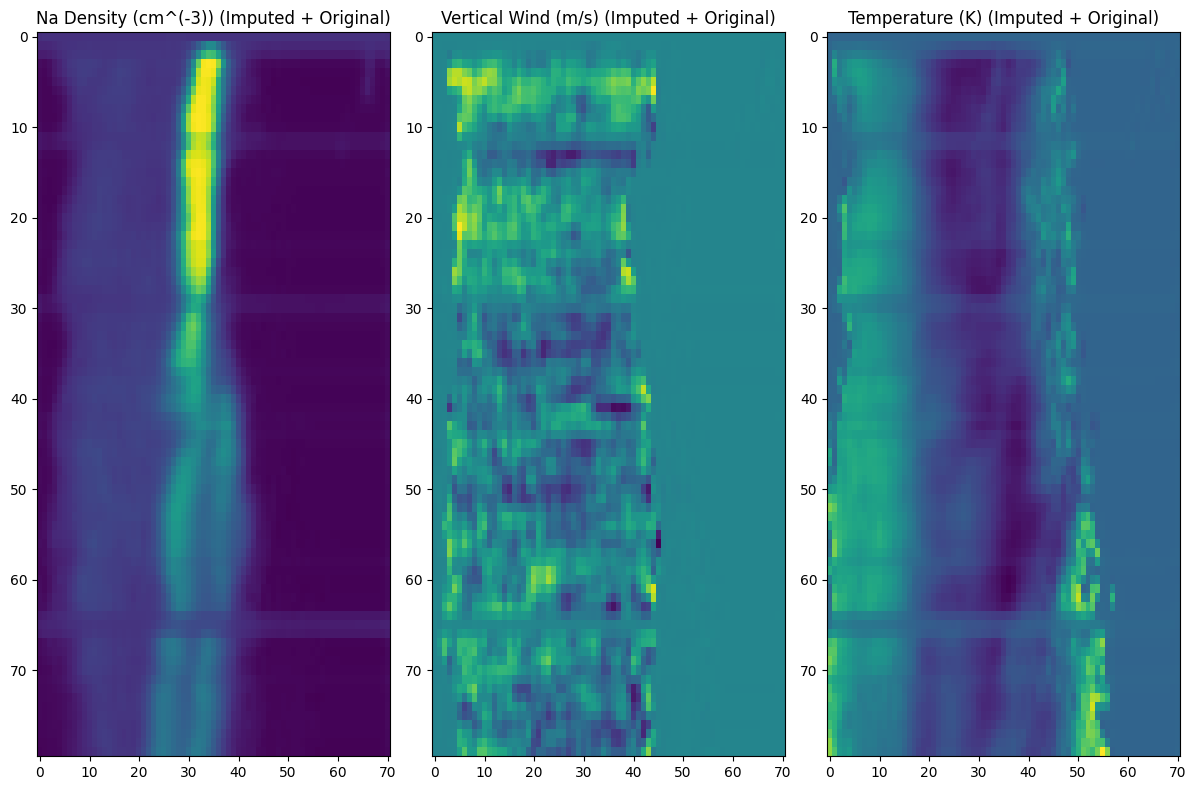

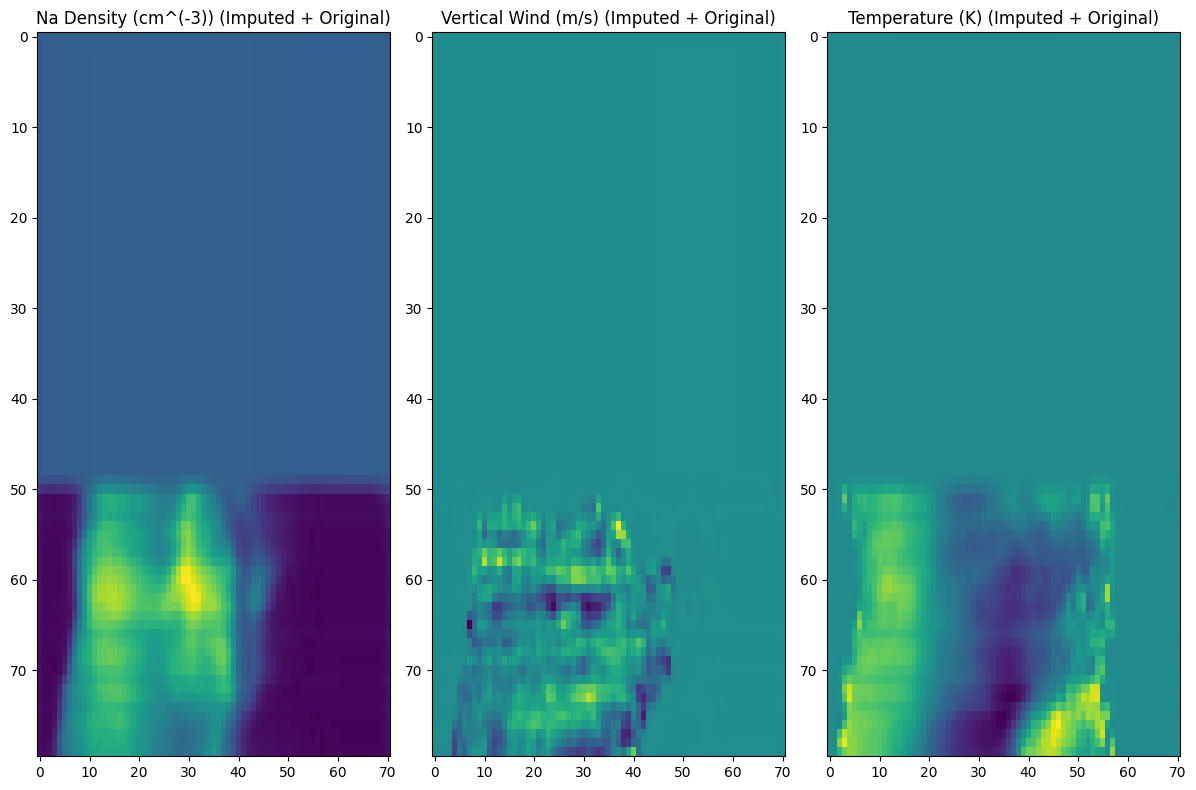

In [4]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import sys
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Paths to custom modules
sys.path.append(os.path.expanduser('/Users/huj7/Desktop/ERAU/MVI-2D/transformer'))

# Import necessary components
from NNstruct_v9 import mask_slices, MultivariableLocalTransformerWithChannelMixer, extract_local_window, restore_output_to_original_shape

# Model configuration
batch_size = 16
time_steps = 80
altitude_levels = 71
input_dim = 3   # Sodium density, wind, and temperature are 3-dimensional inputs
d_model = 64    # Reduced embedding dimension
nhead = 8       # Attention heads
num_layers = 4  # Transformer layers
dim_feedforward = 256  # Feedforward layer size
num_epochs = 300  # Number of epochs
window_size = 3
mask_ratio = 0.8  # Adjusted to prevent excessive masking
step_size = 1
base_weight = 1
lambda_smooth = 1

# Define device (CPU or CUDA)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model for multivariable inputs
model = MultivariableLocalTransformerWithChannelMixer(
    input_dim=input_dim,
    d_model=d_model,
    nhead=nhead,
    num_layers=num_layers,
    dim_feedforward=dim_feedforward,
    window_size=window_size  # Assuming a 3x3 local window
).to(device)

# Load the trained model weights
#state_dict = torch.load('/Users/huj7/Desktop/ERAU/MVI-2D/Results/newrun/10_10_24/model_epoch_294.pth')
model.load_state_dict(state_dict)

# Set the model to evaluation mode
model.eval()

# Improved function for multivariable imputation with the updated changes
def impute_multivariable_data_local_window(model, data_dir, train_files, start_UT, end_UT, variables, device, mask_ratio):
    # Create scalers for each variable

    # Iterate over each training file
    for filename in train_files:
        daily_data = load_daily_data(data_dir, [filename], start_UT, end_UT)

        # Combine all variables (e.g., sodium density, wind, temperature)
        all_data = np.stack([np.transpose(np.stack(daily_data[var])) for var in variables], axis=-1)
        original_data = all_data.copy()
        scalers = {var: StandardScaler() for var in variables}
        # Normalize each variable independently, fitting the scaler only on non-missing data
        for var_idx, var in enumerate(variables):
            var_data = all_data[..., var_idx].reshape(-1, 1)  # Flatten the variable data
            scaled_var_data = scalers[var].fit_transform(var_data).reshape(all_data.shape[:-1]) 
            all_data[..., var_idx] = scaled_var_data

        # Convert to torch tensors and move to device
        train_data = torch.tensor(all_data, dtype=torch.float32).to(device)
        train_data = train_data.unsqueeze(0)  # Add batch dimension

        # Create mask for missing values
        mask_train = torch.isnan(train_data).float().to(device)
        mask_train = 1.0 - mask_train
        train_data = torch.nan_to_num(train_data, nan=0.0).to(device)
        target_data = train_data.clone()

        train_dataset = TensorDataset(train_data, target_data, mask_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        for batch_idx, (batch_data, batch_target, batch_mask) in enumerate(train_loader):
            batch_data, batch_target, batch_mask = batch_data.to(device), batch_target.to(device), batch_mask.to(device)

            # Improved masking with realistic clustering and lower mask ratio
            masked_data, random_mask = mask_slices(batch_data, mask_ratio=mask_ratio)
            random_mask = random_mask.unsqueeze(-1)  # Add an extra dimension to match [1, 80, 71, input_dim]

            # Imputation using the model
            with torch.no_grad():
                local_windows, local_masks = extract_local_window(masked_data, random_mask, window_size, step_size)
                imputed_output = model(local_windows)

                # Restore imputed data to original shape using weighted restoration
                restored_data = restore_output_to_original_shape(
                    imputed_output,
                    orig_batch_size=batch_data.shape[0],  # Dynamically assign batch size
                    time_steps=time_steps,
                    altitude_levels=altitude_levels,
                    window_size=window_size,
                    step_size=step_size
                )

            # Combine imputed and original data
            mask_train_np = mask_train.cpu().numpy()  # Still using numpy for mask
            imputed_rescaled_no_nan = np.nan_to_num(restored_data.cpu().numpy(), nan=0.0)
            final_output = imputed_rescaled_no_nan # Combine with original data if necessary

            # Plot the final imputed data for each variable
            fig, axs = plt.subplots(1, len(variables), figsize=(12, 8))
            for var_idx, var in enumerate(variables):
                # Remove any extra dimensions (e.g., batch dimension) before plotting
                data_to_plot = np.squeeze(final_output[..., var_idx])
                axs[var_idx].imshow(data_to_plot, aspect='auto', cmap='viridis')
                axs[var_idx].set_title(f'{var} (Imputed + Original)')
            plt.tight_layout()
            plt.show()

    return final_output

# Run imputation for multiple variables (e.g., Sodium Density, Vertical Wind, Temperature)
variables = ["Na Density (cm^(-3))", "Vertical Wind (m/s)", "Temperature (K)"]
imputed_test_data = impute_multivariable_data_local_window(model, data_dir, train_files, start_UT, end_UT, variables, device, mask_ratio=0.8)
